In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_accident = pd.read_csv("US_Accidents_March23.csv",delimiter=',')

In [4]:
df_accident.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df_accident.shape

(7728394, 46)

<h1 style = 'color:darkslateblue'>Exploration</h1>

In [7]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

<h1 style = 'color:darkslateblue'>Data cleaning</h1>

In [8]:
df_accident = df_accident.drop_duplicates()

In [9]:
df_accident = df_accident.drop(['Country','Street','State','City'],axis = 1)

In [10]:
df_accident = df_accident.drop(['Railway','Airport_Code','Zipcode','ID','Source','Description','Weather_Timestamp','Wind_Chill(F)','Pressure(in)','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Roundabout','Station','Stop','Traffic_Calming','Turning_Loop'],axis = 1)

In [11]:
df_accident.shape

(7728394, 22)

In [26]:
missing = df_accident.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
Timezone                    7808
dtype: int64

In [37]:
df_accident = df_accident.copy()  # Optional, ensures you're working on a copy

df_accident['Precipitation(in)'] = df_accident['Precipitation(in)'].fillna(0)
df_accident['Wind_Speed(mph)'] = df_accident['Wind_Speed(mph)'].fillna(df_accident['Wind_Speed(mph)'].median())
df_accident['Visibility(mi)'] = df_accident['Visibility(mi)'].fillna(df_accident['Visibility(mi)'].median())


In [53]:
df_accident['Start_Time'] = pd.to_datetime(df_accident['Start_Time'].str.split('.').str[0])
df_accident['End_Time'] = pd.to_datetime(df_accident['End_Time'].str.split('.').str[0])


In [70]:
df_accident.isnull().sum()

Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
County                         0
Timezone                    7808
Temperature(F)            163853
Humidity(%)               174144
Visibility(mi)                 0
Wind_Direction            175206
Wind_Speed(mph)                0
Precipitation(in)              0
Weather_Condition              0
Traffic_Signal                 0
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
dtype: int64

In [75]:
df_accident['Temperature(F)'] = df_accident['Temperature(F)'].fillna(df_accident['Temperature(F)'].mean())

In [81]:
df_accident.drop(['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1, inplace=True)

In [97]:
df_accident.isnull().sum()

Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
County                    0
Timezone               7808
Temperature(F)            0
Humidity(%)          174144
Visibility(mi)            0
Wind_Direction       175206
Wind_Speed(mph)           0
Precipitation(in)         0
Weather_Condition         0
Traffic_Signal            0
dtype: int64

In [113]:
df_accident['Humidity(%)'] = df_accident['Humidity(%)'].fillna(df_accident['Humidity(%)'].median())

In [125]:
df_accident['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'North', 'Variable', 'SE', 'SSE', 'ESE', 'East', 'NE',
       'ENE', 'E', 'W', nan, 'S', 'VAR', 'CALM', 'N'], dtype=object)

In [133]:
df_accident['Wind_Direction'] = df_accident['Wind_Direction'].fillna(df_accident['Wind_Direction'].mode()[0])
df_accident['Timezone'] = df_accident['Timezone'].fillna(df_accident['Timezone'].mode()[0])


In [137]:
df_accident.isnull().sum()

Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
County               0
Timezone             0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Traffic_Signal       0
dtype: int64

In [163]:
df_accident.shape

(7728394, 20)

<h1 style = 'color:darkslateblue'>Visualization</h1>

In [141]:
df_accident.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),County,Timezone,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Traffic_Signal
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Montgomery,US/Eastern,36.9,91.0,10.0,Calm,7.0,0.02,Light Rain,False
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Franklin,US/Eastern,37.9,100.0,10.0,Calm,7.0,0.00,Light Rain,False
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Clermont,US/Eastern,36.0,100.0,10.0,SW,3.5,0.00,Overcast,True
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Montgomery,US/Eastern,35.1,96.0,9.0,SW,4.6,0.00,Mostly Cloudy,False
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Montgomery,US/Eastern,36.0,89.0,6.0,SW,3.5,0.00,Mostly Cloudy,True


<h2 style ='color:red'>No. of Accidents over time </h2>

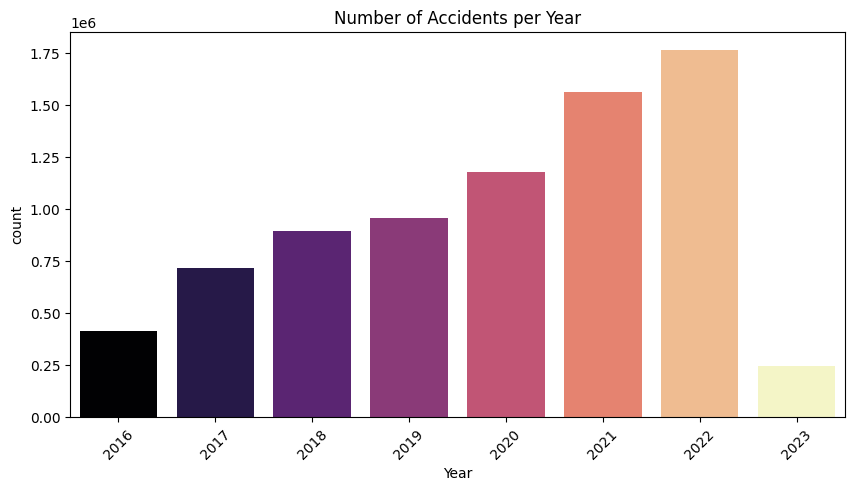

In [169]:
# Extract time-related features
df_accident['Year'] = df_accident['Start_Time'].dt.year
df_accident['Month'] = df_accident['Start_Time'].dt.month
df_accident['Hour'] = df_accident['Start_Time'].dt.hour
df_accident['Weekday'] = df_accident['Start_Time'].dt.day_name()

# Accidents per year
plt.figure(figsize=(10,5))
sns.countplot(data=df_accident, x='Year', palette='magma',hue = 'Year',legend=False)
plt.title('Number of Accidents per Year')
plt.xticks(rotation=45)
plt.show()


<h2 style ='color:red'>Accidents by time of day(hours)</h2>

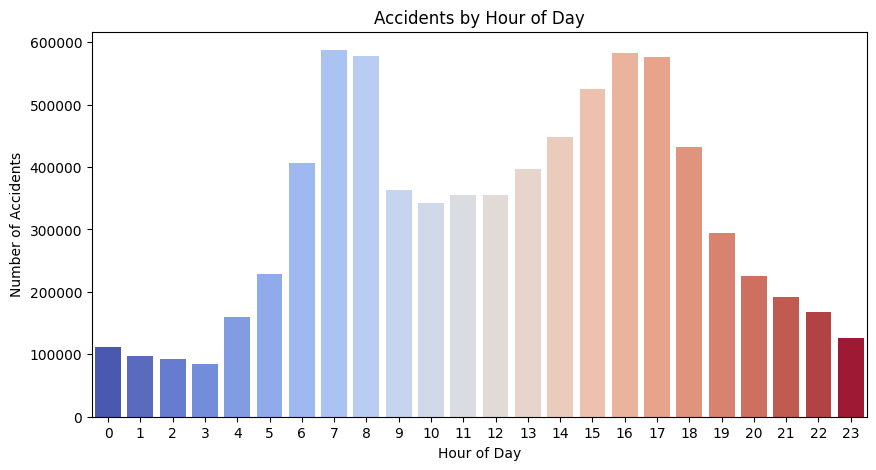

In [155]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_accident, x='Hour', palette='coolwarm',hue = 'Hour',legend = False)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()


<h2 style ='color:red'>Accidents by Weather Condition</h2>

/var/folders/ns/q63dsy4s19d_cq3rdfz20pbw0000gn/T/ipykernel_30698/2139480855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_accident[df_accident['Weather_Condition'].isin(top_weather)],


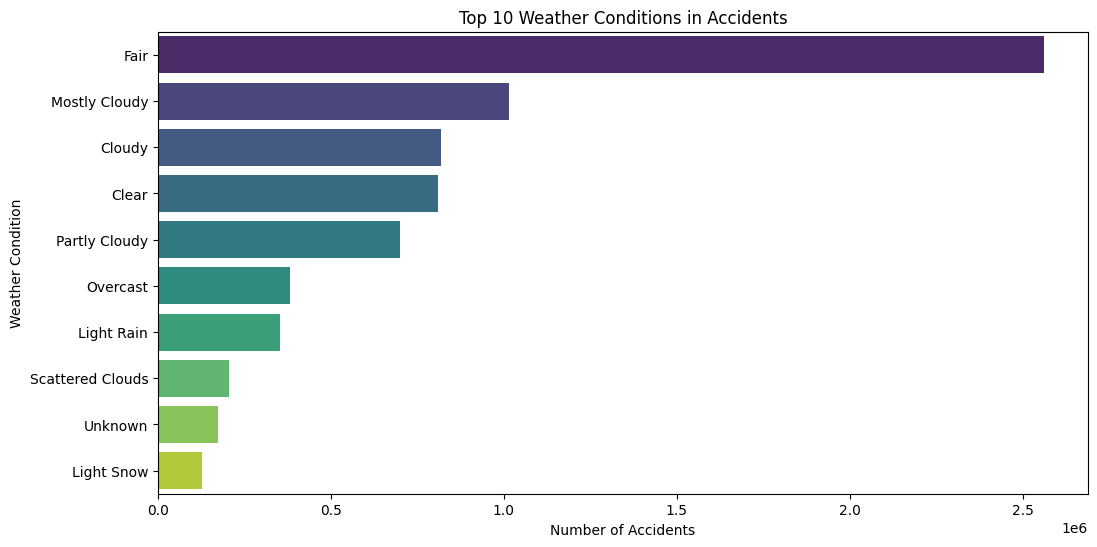

In [165]:
plt.figure(figsize=(12,6))
top_weather = df_accident['Weather_Condition'].value_counts().nlargest(10).index
sns.countplot(data=df_accident[df_accident['Weather_Condition'].isin(top_weather)],
              y='Weather_Condition', order=top_weather, palette='viridis')
plt.title('Top 10 Weather Conditions in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()


In [167]:
df_accident.isnull().sum()

Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
County               0
Timezone             0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Traffic_Signal       0
Year                 0
Month                0
Hour                 0
Weekday              0
dtype: int64

<h2 style ='color:red'>Accident impact count wrt to severity</h2>

/var/folders/ns/q63dsy4s19d_cq3rdfz20pbw0000gn/T/ipykernel_30698/35257237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df_accident, palette='coolwarm')


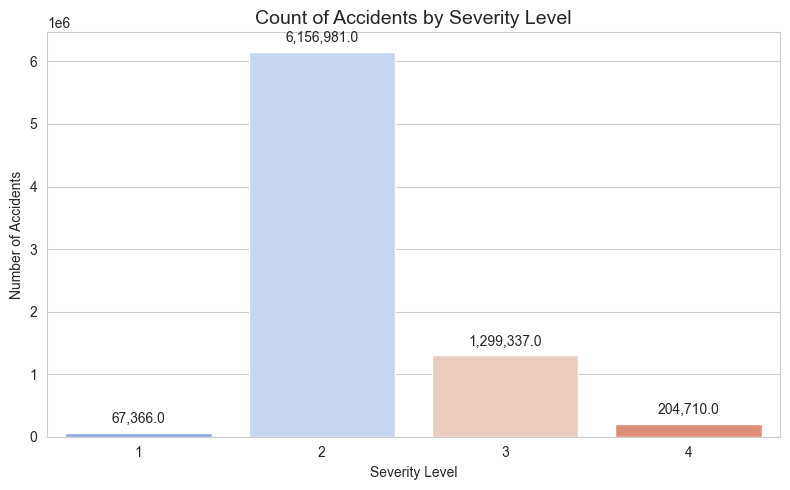

In [171]:
# Set plot style
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Count plot for Severity
sns.countplot(x='Severity', data=df_accident, palette='coolwarm')

# Add labels and title
plt.title("Count of Accidents by Severity Level", fontsize=14)
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")

# Show exact counts on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), ','), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', fontsize=10,
                       xytext = (0, 10), textcoords = 'offset points')

plt.tight_layout()
plt.show()
